In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [1]:
import pandas as pd

df = pd.read_excel('../Data/EURUSD.xlsx')
df.head()

,Date,Close
0,2022-05-15,1.03980
1,2022-05-16,1.04390
2,2022-05-17,1.05487
3,2022-05-18,1.04729
4,2022-05-19,1.05795


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1001 non-null   datetime64[ns]
 1   Close   1001 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


In [264]:
df.set_index('Date', inplace=True)

In [265]:
df.isnull().sum()

,0
Close,0


In [266]:
df['Close_H-1'] = df['Close'].shift(1)
df['Close_H-2'] = df['Close'].shift(2)
df['Close_H-3'] = df['Close'].shift(3)

df.dropna(inplace=True)

print(f"Data setelah feature engineering dan pembersihan. Jumlah baris: {len(df)}")
df.head()

Data setelah feature engineering dan pembersihan. Jumlah baris: 998


,Close,Close_H-1,Close_H-2,Close_H-3
Date,,,,
2022-05-18,1.04729,1.05487,1.04390,1.03980
2022-05-19,1.05795,1.04729,1.05487,1.04390
2022-05-20,1.05610,1.05795,1.04729,1.05487
2022-05-22,1.05689,1.05610,1.05795,1.04729
2022-05-23,1.06837,1.05689,1.05610,1.05795


In [267]:
X = df[['Close_H-1', 'Close_H-2', 'Close_H-3']]
y = df['Close']

CatBoost 70/30

In [268]:
train_size_70 = int(len(X) * 0.7)

X_train_70, X_test_70 = X[:train_size_70], X[train_size_70:]
y_train_70, y_test_70 = y[:train_size_70], y[train_size_70:]
print(f"Pembagian data 70/30: {len(X_train_70)} latih / {len(X_test_70)} uji")

Pembagian data 70/30: 698 latih / 300 uji


In [269]:
print("\nMemulai pelatihan model CatBoost 70/30")
start = time.time()
cbr = CatBoostRegressor()
cbr.fit(X_train_70, y_train_70)
end = time.time()


Memulai pelatihan model CatBoost 70/30
Learning rate set to 0.038682
0:	learn: 0.0320380	total: 1.92ms	remaining: 1.92s
1:	learn: 0.0309481	total: 2.98ms	remaining: 1.49s
2:	learn: 0.0298743	total: 4.02ms	remaining: 1.34s
3:	learn: 0.0288578	total: 5.05ms	remaining: 1.26s
4:	learn: 0.0278924	total: 6.29ms	remaining: 1.25s
5:	learn: 0.0269599	total: 7.42ms	remaining: 1.23s
6:	learn: 0.0260654	total: 8.74ms	remaining: 1.24s
7:	learn: 0.0252145	total: 9.85ms	remaining: 1.22s
8:	learn: 0.0243929	total: 11.2ms	remaining: 1.23s
9:	learn: 0.0235931	total: 12.3ms	remaining: 1.22s
10:	learn: 0.0228559	total: 13.4ms	remaining: 1.2s
11:	learn: 0.0221076	total: 14.4ms	remaining: 1.19s
12:	learn: 0.0213887	total: 15.4ms	remaining: 1.17s
13:	learn: 0.0206963	total: 20.3ms	remaining: 1.43s
14:	learn: 0.0200308	total: 22ms	remaining: 1.44s
15:	learn: 0.0193929	total: 23.7ms	remaining: 1.46s
16:	learn: 0.0188028	total: 26.3ms	remaining: 1.52s
17:	learn: 0.0182141	total: 28.1ms	remaining: 1.53s
18:	lea

In [270]:
print(f"Pelatihan CatBoost 70/30 selesai dalam {end - start:.4f} detik.")

Pelatihan CatBoost 70/30 selesai dalam 1.3840 detik.


In [271]:
y_pred_70 = cbr.predict(X_test_70)

rmse = root_mean_squared_error(y_test_70, y_pred_70)
mae = mean_absolute_error(y_test_70, y_pred_70)
mape = (mean_absolute_percentage_error(y_test_70, y_pred_70)) * 100
r2 = r2_score(y_test_70, y_pred_70)

print("\nHasil evaluasi model CatBoost 70/30:")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.4f}")


Hasil evaluasi model CatBoost 70/30:
RMSE : 0.0190
MAE  : 0.0115
MAPE : 1.02%
R²   : 0.8082


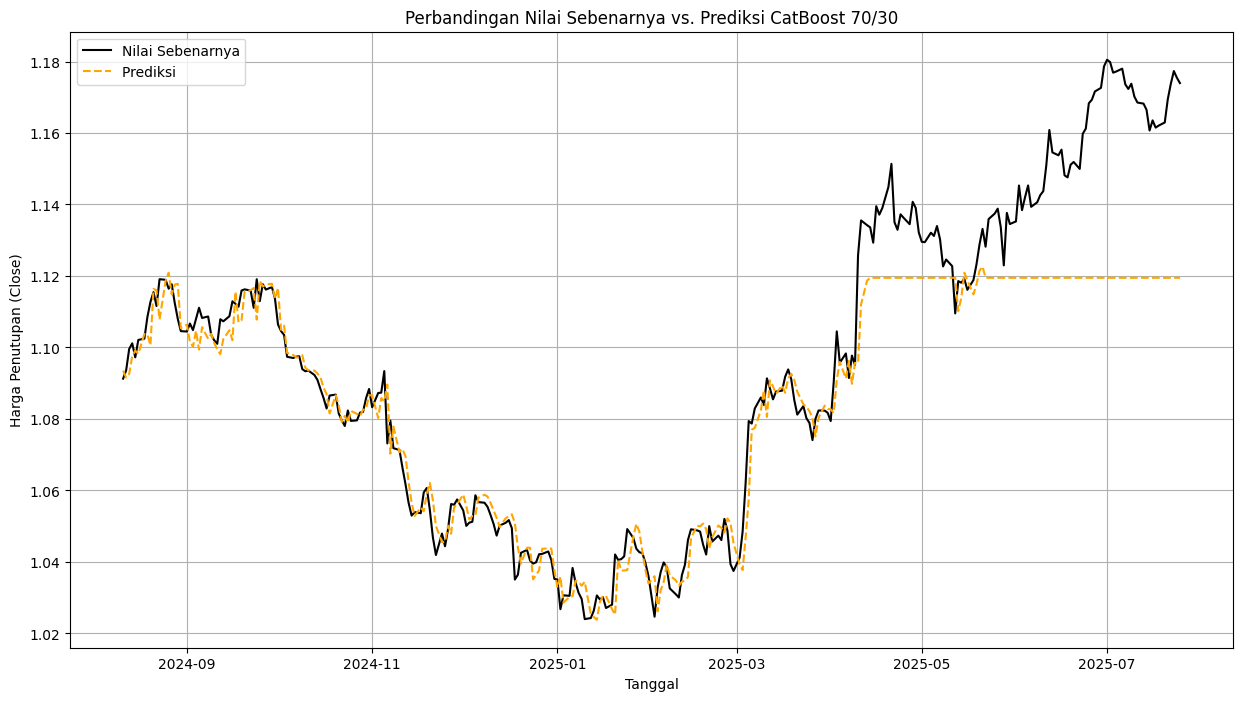

In [272]:
plt.figure(figsize=(15, 8))
test_data = pd.DataFrame({'Nilai Sebenarnya': y_test_70, 'Prediksi CatBoost': y_pred_70}).sort_index()
plt.plot(test_data['Nilai Sebenarnya'], label='Nilai Sebenarnya', color='black')
plt.plot(test_data['Prediksi CatBoost'], label='Prediksi ', color='orange', linestyle='--')
plt.title('Perbandingan Nilai Sebenarnya vs. Prediksi CatBoost 70/30')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Close)')
plt.legend()
plt.grid(True)
plt.show()

CatBoost 80/20

In [273]:
train_size_80 = int(len(X) * 0.8)

X_train_80, X_test_80 = X[:train_size_80], X[train_size_80:]
y_train_80, y_test_80 = y[:train_size_80], y[train_size_80:]
print(f"Pembagian data 80/20: {len(X_train_80)} latih / {len(X_test_80)} uji")

Pembagian data 80/20: 798 latih / 200 uji


In [274]:
print("\nMemulai pelatihan model CatBoost 80/20")
start = time.time()
cbr = CatBoostRegressor()
cbr.fit(X_train_80, y_train_80)
end = time.time()
print(f"Pelatihan CatBoost 80/20 selesai dalam {end - start:.4f} detik.")


Memulai pelatihan model CatBoost 80/20
Learning rate set to 0.039509
0:	learn: 0.0318769	total: 2.35ms	remaining: 2.35s
1:	learn: 0.0307624	total: 3.46ms	remaining: 1.72s
2:	learn: 0.0296722	total: 5.15ms	remaining: 1.71s
3:	learn: 0.0286513	total: 6.21ms	remaining: 1.55s
4:	learn: 0.0276733	total: 7.43ms	remaining: 1.48s
5:	learn: 0.0267332	total: 9.06ms	remaining: 1.5s
6:	learn: 0.0258158	total: 10.1ms	remaining: 1.44s
7:	learn: 0.0249493	total: 11.4ms	remaining: 1.41s
8:	learn: 0.0241167	total: 12.9ms	remaining: 1.42s
9:	learn: 0.0233132	total: 13.9ms	remaining: 1.38s
10:	learn: 0.0225664	total: 15.3ms	remaining: 1.38s
11:	learn: 0.0218031	total: 16.7ms	remaining: 1.38s
12:	learn: 0.0210954	total: 17.8ms	remaining: 1.35s
13:	learn: 0.0203988	total: 18.9ms	remaining: 1.33s
14:	learn: 0.0197256	total: 20.4ms	remaining: 1.34s
15:	learn: 0.0190779	total: 21.7ms	remaining: 1.34s
16:	learn: 0.0184859	total: 22.8ms	remaining: 1.32s
17:	learn: 0.0178827	total: 24.4ms	remaining: 1.33s
18:	l

In [275]:
y_pred_80 = cbr.predict(X_test_80)

rmse = root_mean_squared_error(y_test_80, y_pred_80)
mae = mean_absolute_error(y_test_80, y_pred_80)
mape = (mean_absolute_percentage_error(y_test_80, y_pred_80)) * 100
r2 = r2_score(y_test_80, y_pred_80)

print("\nHasil evaluasi model CatBoost 70/30:")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.4f}")


Hasil evaluasi model CatBoost 70/30:
RMSE : 0.0219
MAE  : 0.0146
MAPE : 1.28%
R²   : 0.8131


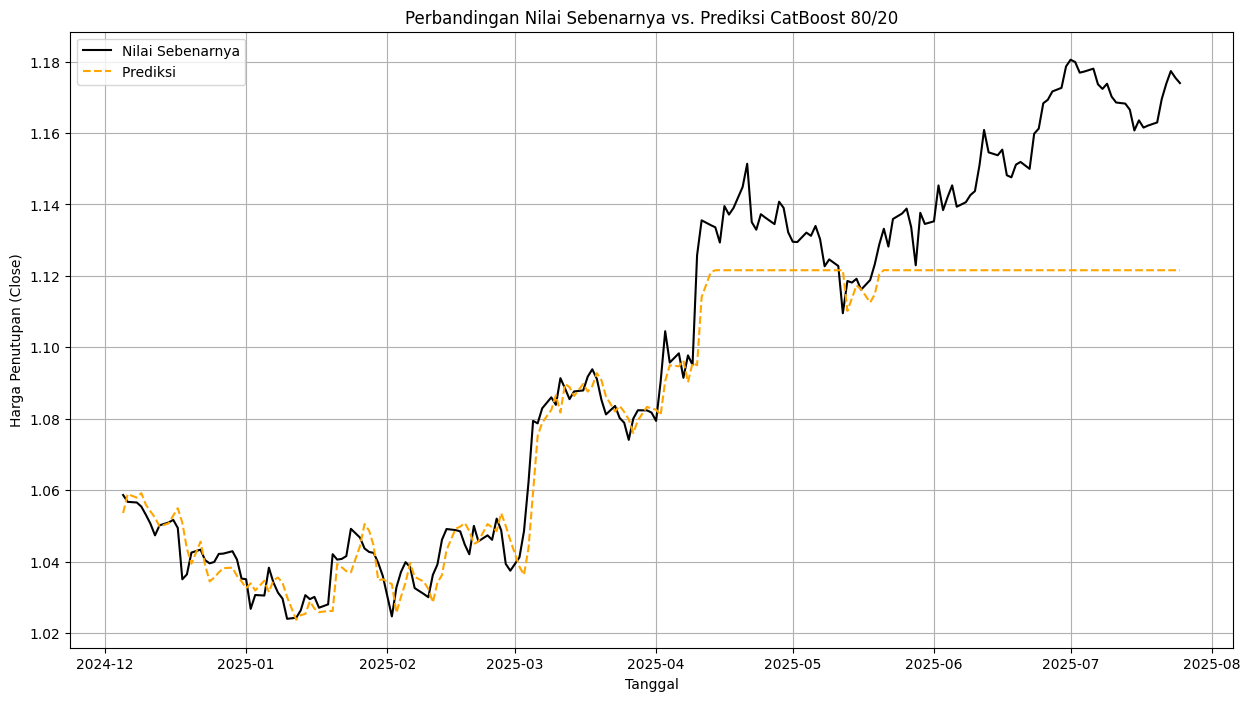

In [276]:
plt.figure(figsize=(15, 8))
test_data = pd.DataFrame({'Nilai Sebenarnya': y_test_80, 'Prediksi CatBoost': y_pred_80}).sort_index()
plt.plot(test_data['Nilai Sebenarnya'], label='Nilai Sebenarnya', color='black')
plt.plot(test_data['Prediksi CatBoost'], label='Prediksi ', color='orange', linestyle='--')
plt.title('Perbandingan Nilai Sebenarnya vs. Prediksi CatBoost 80/20')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Close)')
plt.legend()
plt.grid(True)
plt.show()